In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df_raw = pd.read_csv('data/Churn_Modelling.csv')

In [4]:
df1 = df_raw.copy()
df1 = df1.drop(columns=['RowNumber','CustomerId', 'Surname'], axis=1)
df1.columns = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary',
       'exited']

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
num_of_products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
has_cr_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
is_active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [6]:
df1.dtypes

credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

In [7]:
num_attributes = df1.select_dtypes(include=['int64','float64'])
cat_attributes = df1.select_dtypes(include=['object'])

In [8]:
#df1['credit_score'] = np.log1p(df1['credit_score'])
#df1['age'] = np.log1p(df1['age'])
#df1['tenure'] = np.log1p(df1['tenure'])
#df1['balance'] = np.log1p(df1['balance'])
#df1['estimated_salary'] = np.log1p(df1['estimated_salary'])

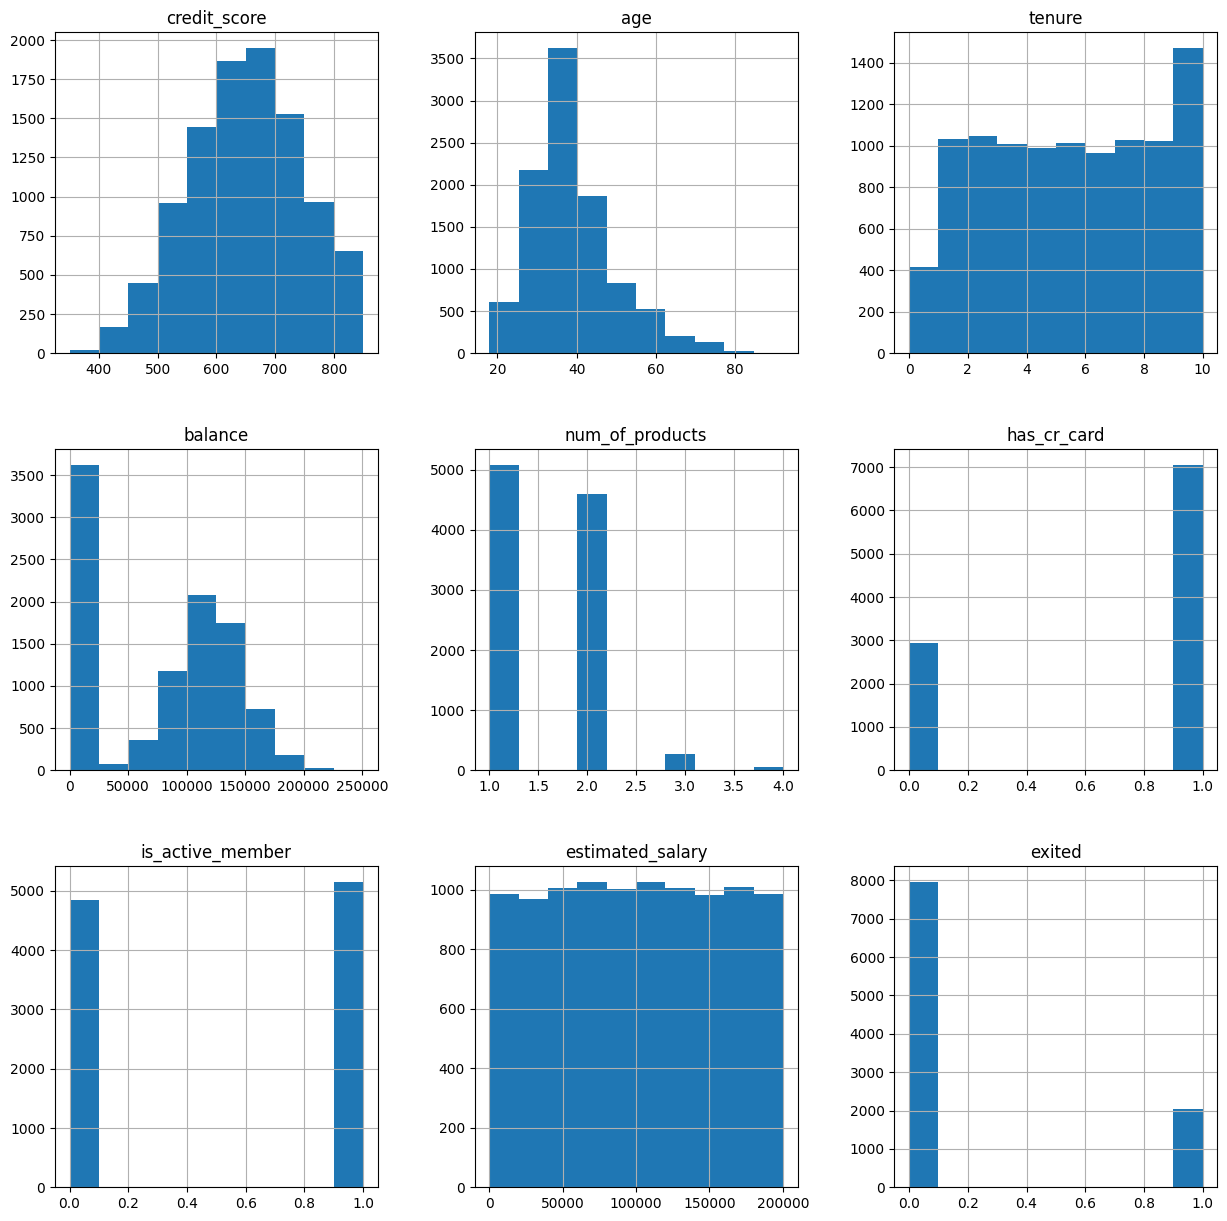

In [9]:
num_attributes.hist(figsize=(15,15));

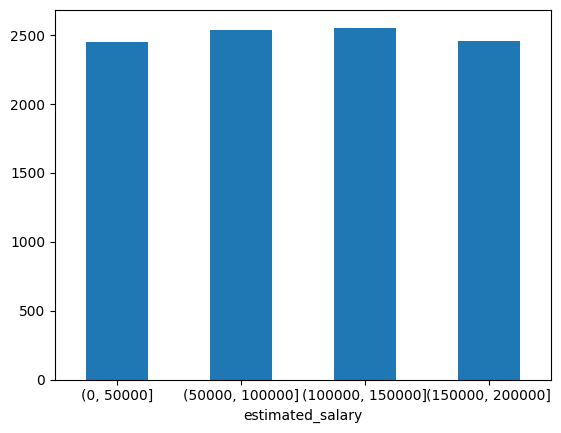

In [72]:
df_aux = pd.cut(df1['estimated_salary'], bins=np.arange(0,200001,50000))
df_aux.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0);

##### Porcentagem das pessoas que sairam do banco

Text(0, 0.5, 'porcentage')

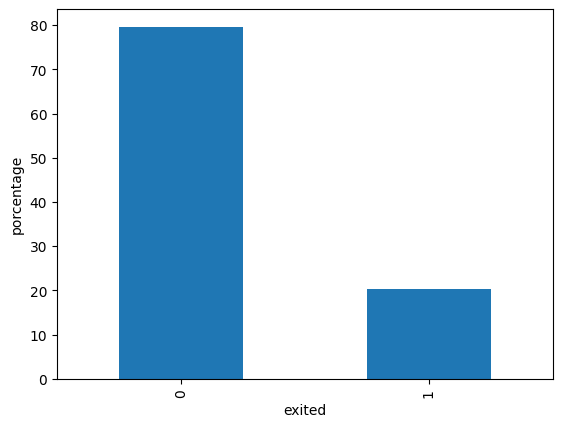

In [11]:
aux = df1['exited'].value_counts()
aux1 = aux / aux.sum() * 100

aux1.plot(kind='bar')
plt.xlabel('exited')
plt.ylabel('porcentage')

##### Contagem das pessoas que sairam do banco por pais

<Axes: xlabel='exited'>

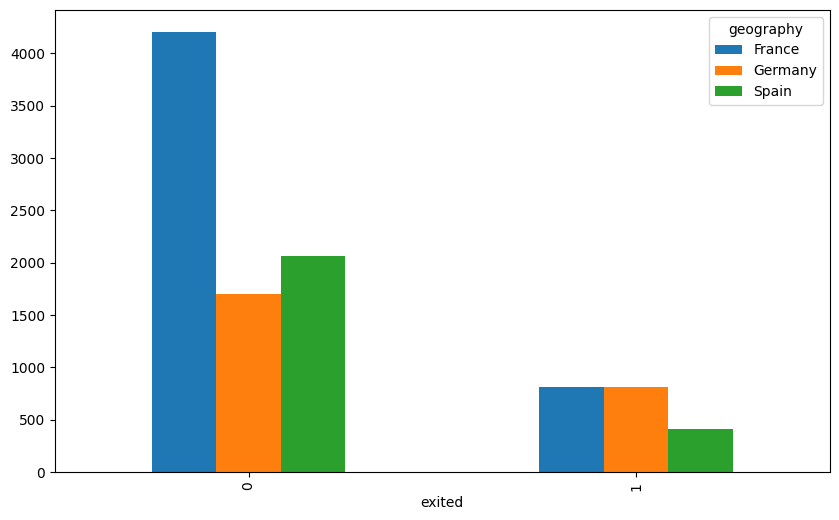

In [27]:
aux = df1.groupby(['exited', 'geography']).size().unstack()
#aux_percent = aux.div(aux.sum(axis=1), axis=0) * 100

aux.plot(kind='bar', figsize=(10, 6))

##### Contagem das pessoas que sairam do banco por genero

<Axes: xlabel='exited'>

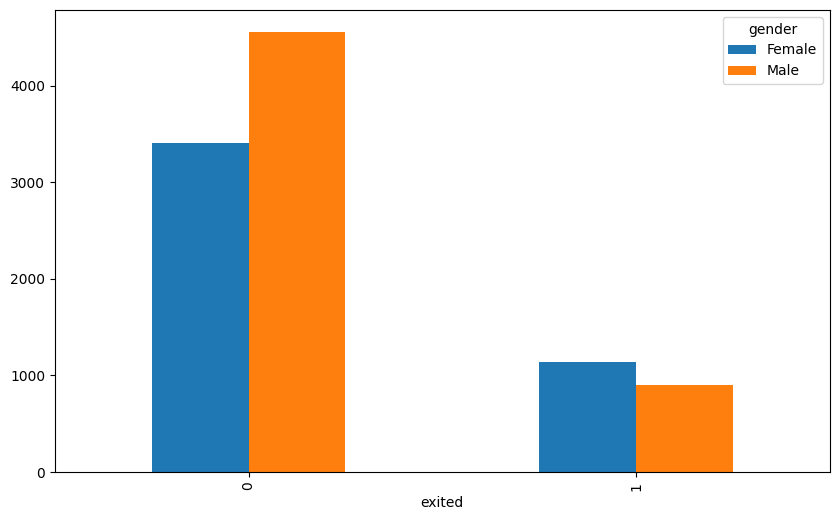

In [28]:
aux = df1.groupby(['exited', 'gender']).size().unstack()
#aux_percent = aux.div(aux.sum(axis=1), axis=0) * 100

aux.plot(kind='bar', figsize=(10, 6))

##### contagem das pessoas que sairam do banco por faixa etaria

C:\Users\Admin\AppData\Local\Temp\ipykernel_18240\3531415359.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux = df1.groupby(['exited', 'age_binned']).size().unstack()


<Axes: xlabel='exited'>

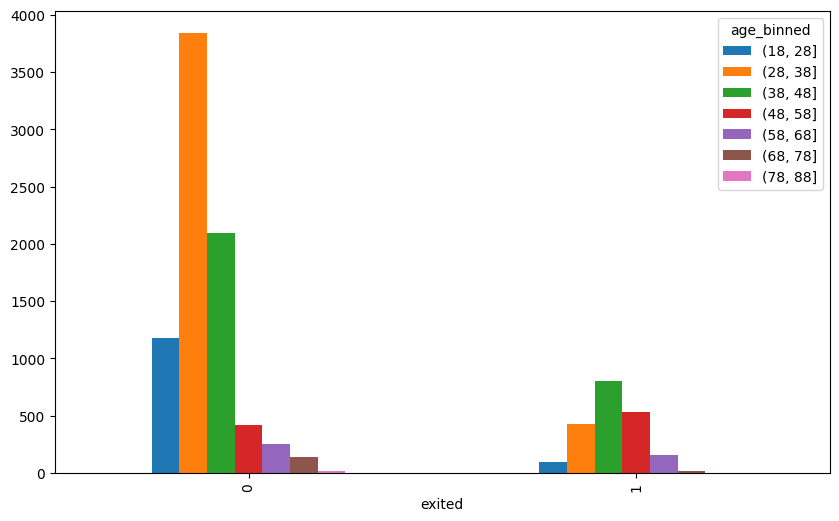

In [47]:
df1['age_binned'] = pd.cut(df1['age'], bins=np.arange(18,98,10))

aux = df1.groupby(['exited', 'age_binned']).size().unstack()
aux.plot(kind='bar', figsize=(10, 6))


##### Distribuicao dos clientes do banco por faixa etaria

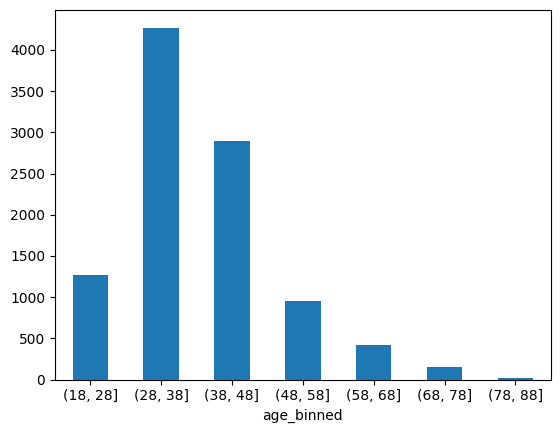

In [56]:
df1['age_binned'] = pd.cut(df1['age'], bins=np.arange(18,98,10))

counts = df1['age_binned'].value_counts().sort_index()
counts.plot(kind='bar');
plt.xticks(rotation=0);

##### Clientes com o credit score mais baixo são mais propensos a sair do banco?

C:\Users\Admin\AppData\Local\Temp\ipykernel_18240\904109996.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aux = df1.groupby('credit_score_binned')['exited'].mean()


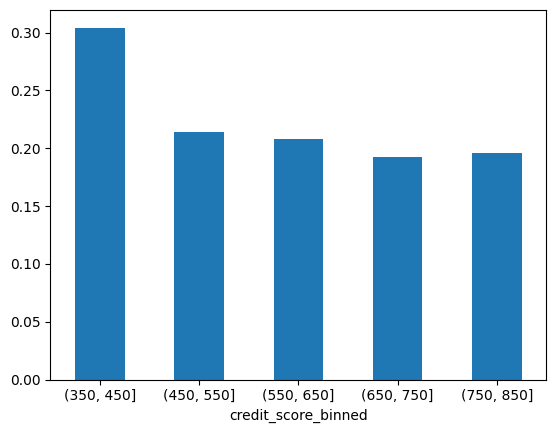

In [70]:
df1['credit_score_binned'] = pd.cut(df1['credit_score'], bins=np.arange(350, 851, 100))
aux = df1.groupby('credit_score_binned')['exited'].mean()
aux.plot(kind='bar')
plt.xticks(rotation=0);

<Axes: xlabel='exited'>

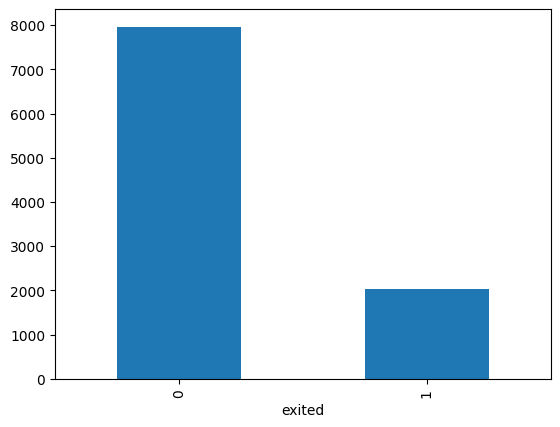

In [14]:
df1['exited'].value_counts().plot(kind='bar')

In [130]:
df2 = df1.drop(columns=['age_binned', 'credit_score_binned'])

##### Preparacao dos dados

In [131]:
df2 = pd.get_dummies(df2, columns=['gender'])
df2 = pd.get_dummies(df2, columns=['geography'])

<Axes: >

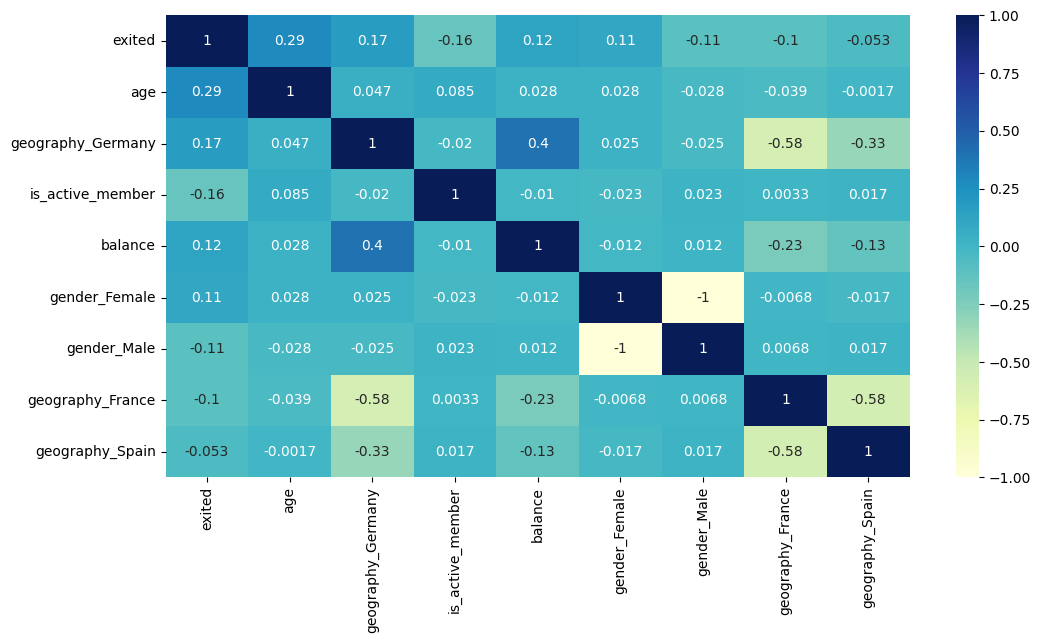

In [132]:
correlations = df2.corr()['exited'].abs().sort_values(ascending=False)
best_correlations = list(correlations[:9].index)
best_correlations_df = df2[best_correlations]

plt.figure(figsize=(12,6))
sns.heatmap(best_correlations_df.corr(), annot=True, cmap='YlGnBu')


In [133]:
x = df2.drop('exited', axis=1)
y = df2['exited']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

scaller = StandardScaler()

x_train_scaled = scaller.fit_transform(x_train)
x_test_scaled = scaller.transform(x_test)

In [139]:
knn = KNeighborsClassifier()

knn.fit(x_train_scaled, y_train)
knn.score(x_test_scaled, y_test)

0.839

In [141]:
param_grid = {
             'n_neighbors': list(range(5,10,2)),
             'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()
classifier = RandomizedSearchCV(knn, param_grid, n_iter=3, cv=3, verbose=2, random_state=42)
classifier.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.3s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.2s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   0.3s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=5, weights=distance; total time=   0.1s
[CV] END ....................n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=9, weights=distance; total time=   0.2s
[CV] END ....................n_neighbors=9, weights=distance; total time=   0.2s


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=3,
                   param_distributions={'n_neighbors': [5, 7, 9],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=2)

In [143]:
classifier_best_grid = classifier.best_estimator_
classifier_best_grid.score(x_test_scaled, y_test)

0.8505

In [144]:
forest = RandomForestClassifier()

param_grid = {
             'n_estimators': list(range(100,500,100))
}

classifier = RandomizedSearchCV(forest, param_grid, n_iter=3, cv=3, verbose=2, random_state=42)
classifier.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...................................n_estimators=200; total time=   2.8s
[CV] END ...................................n_estimators=200; total time=   2.7s
[CV] END ...................................n_estimators=200; total time=   2.7s
[CV] END ...................................n_estimators=400; total time=   5.6s
[CV] END ...................................n_estimators=400; total time=   5.5s
[CV] END ...................................n_estimators=400; total time=   5.7s
[CV] END ...................................n_estimators=100; total time=   1.9s
[CV] END ...................................n_estimators=100; total time=   2.1s
[CV] END ...................................n_estimators=100; total time=   1.3s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'n_estimators': [100, 200, 300, 400]},
                   random_state=42, verbose=2)

In [146]:
classifier_best_grid = classifier.best_estimator_
classifier_best_grid.score(x_test_scaled, y_test)

0.873